Importing dataset

In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [20]:
from pandas import read_excel
import numpy as np
sheetname='June'
path='C:\Git\hackday\input.xlsx'
data=read_excel(path, sheet_name = sheetname)
data.head(10)


,SL. No.,LOCATION,LOCATIONS,DEPARTMENT,TICKET_NO,REGISTRATION_TIME,SUP_FUNCTION,ENTITY,STATUS,CATEGORY,...,RESPONSE_SLA,RESPONSE_SLA_REASON,RESOLUTION_DEADLINE,RESOLUTION_TIME,RESOLUTION_SLA,RESOLUTION_SLA_REASON,RESPONSE ELAPSED TIME,RESOLUTION ELAPSED TIME,SOLUTION,CLOSURE_CODE
0,1,Gurgaon - New Delhi,GGN,Audit-Business,830291,2019-06-10 19:06:10,KGSIT,KPMG Resource Centre Private Limited,Closed,Lost Accessories,...,MET,NaN,2019-06-13 08:49:10,2019-06-12 16:53:08,MET,NaN,19.0,93.0,Laptop Charger provided to user permanently. H...,Successful
1,2,Gurgaon - New Delhi,GGN,Audit-Business,829625,2019-06-07 17:32:58,KGSIT,KPMG Resource Centre Private Limited,Closed,Operating System,...,MET,NaN,2019-06-10 19:47:58,2019-06-10 10:35:20,MET,NaN,7.0,168.0,Laptop Bag provided to user. Hence closed the ...,Successful
2,3,Bangalore - Bangalore One,BLR,MC-Service Now,834461,2019-06-24 11:59:05,KGSIT,KPMG Global Services Private Limited,Assigned,Security Incident,...,MET,NaN,2019-06-25 15:29:05,NaT,NaN,NaN,0.0,3667.0,NaN,NaN
3,4,Bangalore - Bangalore One,BLR,GDC-Audit-Business,831521,2019-06-13 16:29:57,KGSIT,KPMG Global Delivery Center Private Limited,Assigned,Operating System,...,MET,NaN,2019-06-17 11:29:57,NaT,NaN,NaN,35.0,6967.0,NaN,NaN
4,5,Gurgaon - New Delhi,GGN,Audit-Business,829836,2019-06-10 09:24:32,KGSIT,KPMG Resource Centre Private Limited,Closed,Operating System,...,MET,NaN,2019-06-10 21:24:32,2019-06-10 17:12:12,MET,NaN,0.0,468.0,LAN Provided to user. Hence closed the SR.,Successful
5,6,Gurgaon - New Delhi,GGN,Audit-Business,835980,2019-06-27 16:16:07,KGSIT,KPMG Resource Centre Private Limited,Resolved,Hardware Issues,...,MET,NaN,2019-07-01 18:26:07,2019-07-01 11:14:20,MET,NaN,58.0,288.0,<p>HP case has logged. Temp Laptop provided to...,Successful
6,7,Bangalore - Maruthi Infotech Centre,BLR,Technology,836129,2019-06-28 00:00:37,KGSIT,KPMG (India),New,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Gurgaon - New Delhi,GGN,Audit-Business,830867,2019-06-12 09:55:58,KGSIT,KPMG Resource Centre Private Limited,Closed,Hardware Issues,...,MET,NaN,2019-06-12 21:55:58,2019-06-12 14:44:01,MET,NaN,3.0,289.0,Provided VGA Cable to User. Hence closed the SR.,Successful
8,9,Gurgaon - New Delhi,GGN,Audit-Business,836009,2019-06-27 16:57:19,KGSIT,KPMG Resource Centre Private Limited,Resolved,Hardware Issues,...,MET,NaN,2019-07-01 12:09:19,2019-07-01 11:35:04,MET,NaN,25.0,685.0,LG Monitor provided to user. Hence closed the SR.,Successful
9,10,Gurgaon - New Delhi,GGN,Audit-Business,834880,2019-06-25 12:08:58,KGSIT,KPMG Resource Centre Private Limited,Closed,Hardware Issues,...,MET,NaN,2019-06-26 00:08:58,2019-06-25 16:29:58,MET,NaN,19.0,261.0,LAN cable provided to user. Hence closed the SR.,Successful


In [21]:
data.dtypes
data.isnull().sum()
data.dropna(subset=["CATEGORY"],axis=0, inplace=True)
data.dropna(subset=["DEPARTMENT"],axis=0, inplace=True)
data.dropna(subset=["LOCATION"],axis=0, inplace=True)
data.dropna(subset=["RESOLUTION_SLA"],axis=0, inplace=True)
data.isnull().sum()

SL. No.                       0
LOCATION                      0
LOCATIONS                     0
DEPARTMENT                    0
TICKET_NO                     0
REGISTRATION_TIME             0
SUP_FUNCTION                  0
ENTITY                        0
STATUS                        0
CATEGORY                      0
DESCRIPTION                  77
PENDINGREASON              4410
PRIORITY                      0
CRITICALITY                   0
SLA_NAME                      0
WORKGROUP                     0
ASSIGNED_ENGINEER             0
RESPONSE_DEADLINE             0
RESPONSE_TIME                 0
RESPONSE_SLA                  0
RESPONSE_SLA_REASON        4108
RESOLUTION_DEADLINE           0
RESOLUTION_TIME               0
RESOLUTION_SLA                0
RESOLUTION_SLA_REASON      4199
RESPONSE ELAPSED TIME         0
RESOLUTION ELAPSED TIME       0
SOLUTION                      0
CLOSURE_CODE                  0
dtype: int64

In [22]:
data.dtypes

SL. No.                             int64
LOCATION                           object
LOCATIONS                          object
DEPARTMENT                         object
TICKET_NO                           int64
REGISTRATION_TIME          datetime64[ns]
SUP_FUNCTION                       object
ENTITY                             object
STATUS                             object
CATEGORY                           object
DESCRIPTION                        object
PENDINGREASON                      object
PRIORITY                           object
CRITICALITY                        object
SLA_NAME                           object
WORKGROUP                          object
ASSIGNED_ENGINEER                  object
RESPONSE_DEADLINE          datetime64[ns]
RESPONSE_TIME              datetime64[ns]
RESPONSE_SLA                       object
RESPONSE_SLA_REASON                object
RESOLUTION_DEADLINE        datetime64[ns]
RESOLUTION_TIME            datetime64[ns]
RESOLUTION_SLA                    

In [23]:
##################
#EDA analysis
##################
data.dtypes

type(data)
data.columns

###Columns in focus to generate new columns RESPONSE_SLA_TIME, RESOLUTION_SLA_TIME
# REGISTRATION_TIME
# RESPONSE_DEADLINE
# RESOLUTION_DEADLINE

#print(data['RESPONSE_DEADLINE'] - data['REGISTRATION_TIME'])
toprecords= data.head(10)

#SLA time
data['RESPONSE_SLA_TIME']= data['RESPONSE_DEADLINE'] - data['REGISTRATION_TIME']
data['RESOLUTION_SLA_TIME']= data['RESOLUTION_DEADLINE'] - data['REGISTRATION_TIME']

data['RESPONSE_SLA_TIME'] = data['RESPONSE_SLA_TIME'] / np.timedelta64(1, 'm')
data['RESOLUTION_SLA_TIME'] = data['RESOLUTION_SLA_TIME'] / np.timedelta64(1, 'm')

#Actual time / Elapsed time
data['RESPONSE ELAPSED TIME'] = data['RESPONSE_TIME'] - data['REGISTRATION_TIME']
data['RESOLUTION ELAPSED TIME'] = data['RESOLUTION_TIME'] - data['REGISTRATION_TIME']

data['RESPONSE ELAPSED TIME'] = data['RESPONSE ELAPSED TIME'] / np.timedelta64(1, 'm')
data['RESOLUTION ELAPSED TIME'] = data['RESOLUTION ELAPSED TIME'] / np.timedelta64(1, 'm')

data.dtypes

data.head(5)
#print(toprecords['CATEGORY'], toprecords['RESOLUTION_TIME'] - toprecords['REGISTRATION_TIME'])

data.dropna(subset=["RESPONSE ELAPSED TIME"],axis=0, inplace=True)
data.dropna(subset=["RESOLUTION ELAPSED TIME"],axis=0, inplace=True)

data['RESPONSE_ELAPSED_TIME'] = data['RESPONSE ELAPSED TIME'].astype('int')
data['RESOLUTION_ELAPSED_TIME'] = data['RESOLUTION ELAPSED TIME'].astype('int')


data['RESPONSE_SLA_TIME'] = data['RESPONSE_SLA_TIME'].astype('int')
data['RESOLUTION_SLA_TIME'] = data['RESOLUTION_SLA_TIME'].astype('int')

#Columns already which we have
#  RESPONSE ELAPSED TIME
#  RESOLUTION ELAPSED TIME

data.columns

data['REGISTRATION_DATE'] = data["REGISTRATION_TIME"].values.astype('datetime64[D]')

subdata=data[['REGISTRATION_DATE','LOCATIONS','DEPARTMENT','CATEGORY','CRITICALITY','RESOLUTION_SLA_TIME','RESOLUTION_ELAPSED_TIME','RESOLUTION_SLA']]
print("subdata") 

subdata = subdata.groupby(['REGISTRATION_DATE','LOCATIONS','DEPARTMENT','CATEGORY','CRITICALITY','RESOLUTION_SLA'], as_index=False).sum()

subdata

subdata2 = data[['REGISTRATION_DATE','LOCATIONS','DEPARTMENT','CATEGORY','CRITICALITY','RESOLUTION_SLA','TICKET_NO']]

subdata2 = subdata2.groupby(['REGISTRATION_DATE','LOCATIONS','DEPARTMENT','CATEGORY','CRITICALITY','RESOLUTION_SLA'], as_index=False).count()



resourcedf =  data[['REGISTRATION_DATE','LOCATIONS','DEPARTMENT','CATEGORY','CRITICALITY', 'ASSIGNED_ENGINEER','RESOLUTION_SLA']]

resourcedf = resourcedf.groupby(['REGISTRATION_DATE','LOCATIONS','DEPARTMENT','CATEGORY','CRITICALITY','RESOLUTION_SLA'], as_index=False).ASSIGNED_ENGINEER.nunique().to_frame()

resourcedf

mergedf = pd.concat([subdata, subdata2,resourcedf], axis=1)

#mergedf.to_csv('aggredateddata.csv', index=False)


#Modifed dataset
modifedDataset = mergedf.rename(columns = {"TICKET_NO": "NO_OF_TICKETS",
                                  "ASSIGNED_ENGINEER":"TOTAL_NO_OF_ASSIGNED_ENGINEERS"
                                  })

#modifedDataset = mergedf.rename(index = {"TICKET_NO": "NO_OF_TICKETS",
                                 # "ASSIGNED_ENGINEER":"TOTAL_NO_OF_ASSIGNED_ENGINEERS"
                                 # }, 
                                 #inplace = True)


#Overallresource=99
#Perdayresourcedeployment given by resource

modifedDataset = modifedDataset.loc[:,~modifedDataset.columns.duplicated()]

modifedDataset['OVERALL_NO_OF_ASSIGNED_ENGINEERS']=99



modifedDataset.head(5)

#data.dtypes
#Input variables
#REGISTRATION_DATE --Not required
#LOCATION
#DEPARTMENT
#CATEGORY
#CRITICALITY
#No.OFTICKETS
#No.OFRESOURCES
#RESOLUTION_SLA_TIME
#RESOLUTION ELAPSED TIME

#Target variable 
#RESOLUTION_SLA


subdata


,REGISTRATION_DATE,LOCATIONS,DEPARTMENT,CATEGORY,CRITICALITY,RESOLUTION_SLA,RESOLUTION_SLA_TIME,RESOLUTION_ELAPSED_TIME,NO_OF_TICKETS,TOTAL_NO_OF_ASSIGNED_ENGINEERS,OVERALL_NO_OF_ASSIGNED_ENGINEERS
0,2019-06-01,BLR,KTech-RDC,Operating System,Minor,MET,4495,3214,1,1,99
1,2019-06-01,BLR,MC -Technical Support Team,Hosted Applications,Minor,MET,3402,2730,1,1,99
2,2019-06-01,BLR,MC-IT Advisory-CIO Advisory,Operating System,Minor,MET,7241,5967,1,1,99
3,2019-06-01,BLR,Tax-IES,Login issues,Minor,MET,720,0,1,1,99
4,2019-06-01,BLR,Technology,Operating System,Minor,MET,49716,1805,69,4,99


In [48]:
#Trim spaces
modifedDataset['LOCATIONS'] = modifedDataset['LOCATIONS'].str.replace(' ', '')
modifedDataset['DEPARTMENT'] = modifedDataset['DEPARTMENT'].str.replace(' ', '')
modifedDataset['CATEGORY'] = modifedDataset['CATEGORY'].str.replace(' ', '')
modifedDataset['CRITICALITY'] = modifedDataset['CRITICALITY'].str.replace(' ', '')
modifedDataset['RESOLUTION_SLA'] = modifedDataset['RESOLUTION_SLA'].str.replace(' ', '')

#input variables
X = modifedDataset[['LOCATIONS','DEPARTMENT','CATEGORY','CRITICALITY','RESOLUTION_SLA_TIME','RESOLUTION_ELAPSED_TIME','NO_OF_TICKETS','TOTAL_NO_OF_ASSIGNED_ENGINEERS','OVERALL_NO_OF_ASSIGNED_ENGINEERS']].values

#target variable
y = modifedDataset[['RESOLUTION_SLA']].values

print(type(X))
#data.CATEGORY.unique()
#data.DEPARTMENT.unique()

<class 'numpy.ndarray'>


In [65]:
#['GGN', 'Technology', 'OperatingSystem', 'Minor', 3798, 3101, 1, 1, 99]
modifedDataset[(modifedDataset['LOCATIONS']=='GGN')  & (modifedDataset['DEPARTMENT']=='Technology') & (modifedDataset['CATEGORY']=='OperatingSystem') & (modifedDataset['CRITICALITY']=='Minor')]

,REGISTRATION_DATE,LOCATIONS,DEPARTMENT,CATEGORY,CRITICALITY,RESOLUTION_SLA,RESOLUTION_SLA_TIME,RESOLUTION_ELAPSED_TIME,NO_OF_TICKETS,TOTAL_NO_OF_ASSIGNED_ENGINEERS,OVERALL_NO_OF_ASSIGNED_ENGINEERS
5,2019-06-01,GGN,Technology,OperatingSystem,Minor,MET,36146,34706,1,1,99
10,2019-06-02,GGN,Technology,OperatingSystem,Minor,MET,3798,3101,1,1,99
111,2019-06-03,GGN,Technology,OperatingSystem,Minor,MET,31006,30108,2,2,99
681,2019-06-10,GGN,Technology,OperatingSystem,Minor,MET,720,93,1,1,99
833,2019-06-11,GGN,Technology,OperatingSystem,Minor,MET,1647,1377,1,1,99
967,2019-06-12,GGN,Technology,OperatingSystem,Minor,MET,1050,65,1,1,99
1092,2019-06-13,GGN,Technology,OperatingSystem,Minor,MET,11841,11187,1,1,99
1200,2019-06-14,GGN,Technology,OperatingSystem,Minor,MET,964,461,1,1,99
1475,2019-06-18,GGN,Technology,OperatingSystem,Minor,MET,2068,1391,1,1,99
1582,2019-06-19,GGN,Technology,OperatingSystem,Minor,MET,32152,28930,3,3,99


In [25]:
modifedDataset.columns

Index(['REGISTRATION_DATE', 'LOCATIONS', 'DEPARTMENT', 'CATEGORY',
       'CRITICALITY', 'RESOLUTION_SLA', 'RESOLUTION_SLA_TIME',
       'RESOLUTION_ELAPSED_TIME', 'NO_OF_TICKETS',
       'TOTAL_NO_OF_ASSIGNED_ENGINEERS', 'OVERALL_NO_OF_ASSIGNED_ENGINEERS'],
      dtype='object')

In [26]:
## Decision tree cannot deal with Categoric varables 
from sklearn import preprocessing

le_LOCATIONS = preprocessing.LabelEncoder()
le_LOCATIONS.fit(['BLR', 'GGN', 'KOC',
       'PNQ', 'HYD'])

X[:,0] = le_LOCATIONS.transform(X[:,0]) 


le_DEPARTMENT = preprocessing.LabelEncoder()
le_DEPARTMENT.fit(['Audit-Business', 'Audit-Management', 'CapabilityHubs-RPOBusiness',
       'FRM', 'GRCS-DEL', 'Technology', 'CF-HR', 'K-CRC-RBSPPI-Permanent',
       'K-CRC-RBSPPI-Retainers', 'RC-RA-InternalAudit&EnterpriseRisk',
       'Administration', 'CapabilityHubs-KM-Knowledge',
       'CapabilityHubs-CorporateMGT',
       'CapabilityHubs-Research-LegalSupport', 'DACore-TS-FA/FDD',
       'T&RCore-CF-VALS', 'MC-PMO', 'T&RCore-InfraGILT',
       'T&RCore-Strategy', 'T&RCore-TS-FA/FDD', 'T&RCore-AAS',
       'T&RCore-CF-M&A', 'T&RCore-InfraModeling', 'GDC-Audit-Business',
       'Tax-CorpTax', 'Tax-Common', 'Tax-GMS', 'Tax-ProjectSalt',
       'MC-PMOPoolingIES', 'T&RCore-Modeling', 'GDC2-Tax-Valuation',
       'AdvisoryInnovation', 'T&RCore-SPIInsights',
       'T&RCoreIntegration/Separation', 'T&RCore-TSINFRA', 'MC-P3',
       'RC-RA-MajorProjects&ContractAdvisory',
       'CapabilityHubs-Research-DAHub', 'T&RCore-Infrastructure',
       'T&RCore-RES-Modelling', 'C&O-ProductOperations&Procurement',
       'T&RCore-CF-CAG', 'MC-Global-ProjectDelivery-RM',
       'RCCore-Modeling', 'MC-ITAdvisory-EIM', 'IT', 'T&R-Management',
       'GDCAdv-RC-RS&C-Forensic', 'MC-CH-Data&Analytics',
       'T&RCore-Benchmarking', 'MC-SharedServices&Outsourcing',
       'CF-Facilities&Admin', 'T&RCore-ITDevelopment',
       'CapabilityHubs-UKResearch&Benchmarking',
       'CapabilityHubs-AMS-Marketing', 'CapabilityHubs-Research-DA-MGT',
       'T&RCore-ITDueDiligence', 'CapabilityHubs-BusinessSupportGroup',
       'GDC2-T&RCore-FDD', 'CapabilityHubs-RPOUKPeopleCenterteam',
       'T&RCore-StrategyPooling', 'T&RCore-ManagementStrategy', 'CF-CSR',
       'MC-ITAdvisory-Testing,QA', 'TE-ES-Workday',
       'GDCAdv-RC-RA-ITAudit&Assurance', 'TE-ES-EnterpriseAnalytics',
       'MC-TechnicalSupportTeam', 'KGS-Adv-Ops-DedicatedSupport',
       'Tax-IES', 'Tax-TPL', 'Tax-SBA', 'Tax-PrivateTaxCompliance',
       'CapabilityHubs-Research-MD-PRA', 'MC-PMOAuditCore',
       'CapabilityHubs-AMS-KBSSalesPipeline',
       'CapabilityHubs-Research-MD-SECRES',
       'CapabilityHubs-Pursuits-DAHub', 'CapabilityHubs-Research-GC&K',
       'CapabilityHubs-Research-MD-CI', 'CapabilityHubs-KM-Audit',
       'RAK-Research', 'GRCS-BLR', 'RC-RS&C-RiskAnalytics',
       'RC-RS&C-Spectrum', 'RC-TR-Cyber', 'RC-RA-ITAudit&Assurance',
       'MC-GDN-Workday', 'Tax-Management',
       'TE-AI2-RoboticsProcessAutomation', 'KPMGBusinessSchool',
       'MC-GDN-D&A', 'CapabilityHubs-Research-Tax', 'RC-TR-GRCTechnology',
        'KTech-ES', 'TE-ES-OracleFinancials', 'MC-PMOESS',
       'GDC2-T&RCore-Benchmarking', 'MC-ITAdvisory-CIOAdvisory',
       'CF-HRGDC', 'MC-TaxTechnologyHub',
       'MC-Global-FunctionalSupport-RM', 'GDCAudit-Management',
       'MC-ServiceNow', 'MC-GDN-ServiceNow', 'TE-AI2-ProcessAutomation',
       'CapabilityHubs-AMS-MD-ACT', 'CapabilityHubs-PursuitsCentral',
       'MC-FinancialManagement', 'T&RCore-TVP',
       'MC-Global-Communities-RM', 'CF-HRKRC', 'MC-KLA',
       'RC-FORENSIC-ASTRUS', 'RC-Management',
       'CapabilityHubs-KM-Platform-Content', 'CapabilityHubs-QRM-AML',
       'Tax-CorptaxManagement', 'CapabilityHubs-Benchmarking-ABB',
       'MC-ITAdvisory-SAP', 'CapabilityHubs-MS-Graphics',
       'CF-Risk-&-Legal', 'CF-HRMC', 'T&RHub-CreativeServices',
       'CapabilityHubs-MS-CreativeCentral', 'Tax-Pooling-TP',
       'RC-Digital', 'TE-ES-OracleHCM', 'MC-Management', 'MS-Marvel',
       'CapabilityHubs-Research-GCM', 'RC-RS&C-Forensic',
       'GDCAudit-ProductIntegrity', 'KTech-RDC',
       'GDCAudit-InformationTechnologyTechnicalLeads', 'CF-HRRC',
       'Audit-RC', 'MC-People&Change',
       'CapabilityHubs-Pursuits-MD-MPC-BGL',
       'MC-Quality/ProcessExcellence', 'MC-PMOManagement',
       'C&O-CustomerSolutions', 'MC-Pooling', 'SGI-D&A',
       'MCCore-Modeling', 'MC-Global-Methods-RM', 'GDC2-T&RCore-AAS',
       'MC-PMO-DACore', 'C&O-ServiceOperations-HCLS', 'MC-FS', 'CF-SPMO',
       'GDCAudit-IntelligentAutomation', 'MC-Global-Insights-RM',
       'LH-HCLS-OB', 'T&RCore-ITDevelopmentTesting',
       'MC-GDN-ProductOperations&Procurement', 'MC-DMS',
       'MC-ITAdvisory-EPM', 'MC-PMOESSGDC2', 'MC-AppSupport',
       'MC-CH-GlobalD&A', 'MC-TaxTechnologyD&A',
       'CapabilityHubs-MS-DAHub', 'MS', 'Forensic-Inv', 'Tax-R&D',
       'CapabilityHubs-KM-GCM-GTM', 'GDCAdv-RC-RS&C-RiskAnalytics',
       'RC-Secondments', 'Tax-RMTCorpTax-SEZ', 'Digital',
       'TE-ES-Microsoft', 'CapabilityHubs-KM-DigitalMarketing',
       'MS-Rubicon', 'CapabilityHubs-AMS-GCMPlatinumSupport',
       'CapabilityHubs-ResourceManagement', 'GPOS-Management',
       'MC-HyperionFT', 'MC-PMOGCMS', 'ITSupport', 'Tax-Assurance',
       'RAK-Research-LegalSupport', 'CS-Graphics',
       'CapabilityHubs-AMS-FS', 'Tax-M&A', 'MC-PMOTCoE',
       'CapabilityHubs-Pursuits-RC', 'Tax-PMOManagement', 'HR', 'BPS',
       'RC-Forensic-ComplianceandMonitoring', 'GPOS-GLMS',
       'CapabilityHubs-Research-SN', 'RC-RS&C-Operations&ComplianceRisk',
       'KGSMNationalLeadership', 'CapabilityHubs-Research-MGT',
       'AdvisoryOperations', 'KGS-Adv-RPA-TIGER', 'Audit-DEL', 'RC-AAS',
       'CapabilityHubs-AMS-KBSAccountSupport', 'MC-Global-Tech&Infra-RM',
       'Tax-PE', 'MC-PoweredOperations',
       'CapabilityHubs-QRM-ClientAcceptance', 'CapabilityHubs-KM-Hub',
       'RAK-CRM', 'CapabilityHubs-MS-DAHub-ProofReader',
       'CapabilityHubs-AMS-GCM-Reporting&Solutions', 'GSS-Mar-Comm',
       'GPOS-SPS', 'KGS-LeadsDedicatedOps', 'RAK-RESE-SUPP-REG-SGI',
       'T&RCore-Restructuring/DDL', 'CapabilityHubs-MS-Creative-MC',
       'CapabilityHubs-KM-Portal', 'KGS-Adv-Ops-CentralizedReporting',
       'RC-Queen', 'T&RCore-Analytics', 'MC-Global-StrategySupport-RM',
       'CapabilityHubs-KM-MD-CM', 'CF-IT', 'CapabilityHubs-KM-Strategy',
       'CapabilityHubs-KM-Platform-Search', 'CapabilityHubs-AMS-CRM',
       'CapabilityHubs-KM-GCM-Knowledge',
       'KGSCapabilityHubs-GCM-Knowledge', 'CapabilityHubs-MS-MD-MSS',
       'CapabilityHubs-KM-SOC-MEDIA', 'Finance',
       'CapabilityHubs-Research-MD-MA', 'Tax-Support', 'Audit-DEL-D5',
       'MC-CIOA-ServiceMgmt',
       'CapabilityHubs-AMS-GCMAccountandSectorSupport', 'CF-COOOffice',
       'RAK-ABB-BM', 'CapabilityHubs-MS-Creative-SN',
       'GDC2–T&RCoreCF–TaxValuations',
       'CapabilityHubs-KM-MD-DigitalMarketing', 'CapabilityHubs-KM-M&A',
       'CapabilityHubs-Research-MD-ClientValue',
       'CapabilityHubs-Benchmarking-MC', 'RAK-Marketing-AMS',
       'RAK-ResourceManagement', 'CapabilityHubs-Research-RC',
       'RAK-KM-Knowledge', 'GDCAdv-RC-RA-InternalAudit&EnterpriseRisk',
       'AAS-BLR', 'RAK-KM-Audit'])
X[:,1] = le_DEPARTMENT.transform(X[:,1])


le_CATEGORY = preprocessing.LabelEncoder()
le_CATEGORY.fit(['LostAccessories', 'OperatingSystem', 'HardwareIssues',
       'NetworkIssues', 'HostedApplications', 'Loginissues',
       'ApplicationIssues', 'IPPhone', 'DisplayConfigurationIssues',
       'ReconciliationActivity', 'SecurityIncident', 'UATorTesting',
       'VideoConference'])

X[:,2] = le_CATEGORY.transform(X[:,2]) 



le_CRITICALITY = preprocessing.LabelEncoder()
le_CRITICALITY.fit(['Minor', 'Moderate'])

X[:,3] = le_CRITICALITY.transform(X[:,3]) 



X[0:5]

array([[0, 121, 8, 0, 4495, 3214, 1, 1, 99],
       [0, 167, 3, 0, 3402, 2730, 1, 1, 99],
       [0, 142, 8, 0, 7241, 5967, 1, 1, 99],
       [0, 236, 5, 0, 720, 0, 1, 1, 99],
       [0, 249, 8, 0, 49716, 1805, 69, 4, 99]], dtype=object)

In [27]:
unique, count =np.unique(y,return_counts=True)
print(unique, count)

['MET' 'MISSED'] [2282   97]


In [28]:
#Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1903, 9) (1903, 1)
Test set: (476, 9) (476, 1)


In [29]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
decTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
predTree = decTree.predict(X_test)



[[0 128 0 ... 2 2 99]
 [1 4 3 ... 7 6 99]
 [1 43 8 ... 2 2 99]
 ...
 [0 133 0 ... 2 2 99]
 [0 57 3 ... 1 1 99]
 [0 249 8 ... 13 7 99]]


In [55]:
from sklearn import preprocessing


newData = [['GGN', 'Technology', 'OperatingSystem', 'Minor', 3798, 3101, 1, 1, 99]]

newData = np.array(newData)

le_LOCATIONS = preprocessing.LabelEncoder()
le_LOCATIONS.fit(['BLR', 'GGN', 'KOC',
       'PNQ', 'HYD'])

newData[:,0] = le_LOCATIONS.transform(newData[:,0]) 


le_DEPARTMENT = preprocessing.LabelEncoder()
le_DEPARTMENT.fit(['Audit-Business', 'Audit-Management', 'CapabilityHubs-RPOBusiness',
       'FRM', 'GRCS-DEL', 'Technology', 'CF-HR', 'K-CRC-RBSPPI-Permanent',
       'K-CRC-RBSPPI-Retainers', 'RC-RA-InternalAudit&EnterpriseRisk',
       'Administration', 'CapabilityHubs-KM-Knowledge',
       'CapabilityHubs-CorporateMGT',
       'CapabilityHubs-Research-LegalSupport', 'DACore-TS-FA/FDD',
       'T&RCore-CF-VALS', 'MC-PMO', 'T&RCore-InfraGILT',
       'T&RCore-Strategy', 'T&RCore-TS-FA/FDD', 'T&RCore-AAS',
       'T&RCore-CF-M&A', 'T&RCore-InfraModeling', 'GDC-Audit-Business',
       'Tax-CorpTax', 'Tax-Common', 'Tax-GMS', 'Tax-ProjectSalt',
       'MC-PMOPoolingIES', 'T&RCore-Modeling', 'GDC2-Tax-Valuation',
       'AdvisoryInnovation', 'T&RCore-SPIInsights',
       'T&RCoreIntegration/Separation', 'T&RCore-TSINFRA', 'MC-P3',
       'RC-RA-MajorProjects&ContractAdvisory',
       'CapabilityHubs-Research-DAHub', 'T&RCore-Infrastructure',
       'T&RCore-RES-Modelling', 'C&O-ProductOperations&Procurement',
       'T&RCore-CF-CAG', 'MC-Global-ProjectDelivery-RM',
       'RCCore-Modeling', 'MC-ITAdvisory-EIM', 'IT', 'T&R-Management',
       'GDCAdv-RC-RS&C-Forensic', 'MC-CH-Data&Analytics',
       'T&RCore-Benchmarking', 'MC-SharedServices&Outsourcing',
       'CF-Facilities&Admin', 'T&RCore-ITDevelopment',
       'CapabilityHubs-UKResearch&Benchmarking',
       'CapabilityHubs-AMS-Marketing', 'CapabilityHubs-Research-DA-MGT',
       'T&RCore-ITDueDiligence', 'CapabilityHubs-BusinessSupportGroup',
       'GDC2-T&RCore-FDD', 'CapabilityHubs-RPOUKPeopleCenterteam',
       'T&RCore-StrategyPooling', 'T&RCore-ManagementStrategy', 'CF-CSR',
       'MC-ITAdvisory-Testing,QA', 'TE-ES-Workday',
       'GDCAdv-RC-RA-ITAudit&Assurance', 'TE-ES-EnterpriseAnalytics',
       'MC-TechnicalSupportTeam', 'KGS-Adv-Ops-DedicatedSupport',
       'Tax-IES', 'Tax-TPL', 'Tax-SBA', 'Tax-PrivateTaxCompliance',
       'CapabilityHubs-Research-MD-PRA', 'MC-PMOAuditCore',
       'CapabilityHubs-AMS-KBSSalesPipeline',
       'CapabilityHubs-Research-MD-SECRES',
       'CapabilityHubs-Pursuits-DAHub', 'CapabilityHubs-Research-GC&K',
       'CapabilityHubs-Research-MD-CI', 'CapabilityHubs-KM-Audit',
       'RAK-Research', 'GRCS-BLR', 'RC-RS&C-RiskAnalytics',
       'RC-RS&C-Spectrum', 'RC-TR-Cyber', 'RC-RA-ITAudit&Assurance',
       'MC-GDN-Workday', 'Tax-Management',
       'TE-AI2-RoboticsProcessAutomation', 'KPMGBusinessSchool',
       'MC-GDN-D&A', 'CapabilityHubs-Research-Tax', 'RC-TR-GRCTechnology',
        'KTech-ES', 'TE-ES-OracleFinancials', 'MC-PMOESS',
       'GDC2-T&RCore-Benchmarking', 'MC-ITAdvisory-CIOAdvisory',
       'CF-HRGDC', 'MC-TaxTechnologyHub',
       'MC-Global-FunctionalSupport-RM', 'GDCAudit-Management',
       'MC-ServiceNow', 'MC-GDN-ServiceNow', 'TE-AI2-ProcessAutomation',
       'CapabilityHubs-AMS-MD-ACT', 'CapabilityHubs-PursuitsCentral',
       'MC-FinancialManagement', 'T&RCore-TVP',
       'MC-Global-Communities-RM', 'CF-HRKRC', 'MC-KLA',
       'RC-FORENSIC-ASTRUS', 'RC-Management',
       'CapabilityHubs-KM-Platform-Content', 'CapabilityHubs-QRM-AML',
       'Tax-CorptaxManagement', 'CapabilityHubs-Benchmarking-ABB',
       'MC-ITAdvisory-SAP', 'CapabilityHubs-MS-Graphics',
       'CF-Risk-&-Legal', 'CF-HRMC', 'T&RHub-CreativeServices',
       'CapabilityHubs-MS-CreativeCentral', 'Tax-Pooling-TP',
       'RC-Digital', 'TE-ES-OracleHCM', 'MC-Management', 'MS-Marvel',
       'CapabilityHubs-Research-GCM', 'RC-RS&C-Forensic',
       'GDCAudit-ProductIntegrity', 'KTech-RDC',
       'GDCAudit-InformationTechnologyTechnicalLeads', 'CF-HRRC',
       'Audit-RC', 'MC-People&Change',
       'CapabilityHubs-Pursuits-MD-MPC-BGL',
       'MC-Quality/ProcessExcellence', 'MC-PMOManagement',
       'C&O-CustomerSolutions', 'MC-Pooling', 'SGI-D&A',
       'MCCore-Modeling', 'MC-Global-Methods-RM', 'GDC2-T&RCore-AAS',
       'MC-PMO-DACore', 'C&O-ServiceOperations-HCLS', 'MC-FS', 'CF-SPMO',
       'GDCAudit-IntelligentAutomation', 'MC-Global-Insights-RM',
       'LH-HCLS-OB', 'T&RCore-ITDevelopmentTesting',
       'MC-GDN-ProductOperations&Procurement', 'MC-DMS',
       'MC-ITAdvisory-EPM', 'MC-PMOESSGDC2', 'MC-AppSupport',
       'MC-CH-GlobalD&A', 'MC-TaxTechnologyD&A',
       'CapabilityHubs-MS-DAHub', 'MS', 'Forensic-Inv', 'Tax-R&D',
       'CapabilityHubs-KM-GCM-GTM', 'GDCAdv-RC-RS&C-RiskAnalytics',
       'RC-Secondments', 'Tax-RMTCorpTax-SEZ', 'Digital',
       'TE-ES-Microsoft', 'CapabilityHubs-KM-DigitalMarketing',
       'MS-Rubicon', 'CapabilityHubs-AMS-GCMPlatinumSupport',
       'CapabilityHubs-ResourceManagement', 'GPOS-Management',
       'MC-HyperionFT', 'MC-PMOGCMS', 'ITSupport', 'Tax-Assurance',
       'RAK-Research-LegalSupport', 'CS-Graphics',
       'CapabilityHubs-AMS-FS', 'Tax-M&A', 'MC-PMOTCoE',
       'CapabilityHubs-Pursuits-RC', 'Tax-PMOManagement', 'HR', 'BPS',
       'RC-Forensic-ComplianceandMonitoring', 'GPOS-GLMS',
       'CapabilityHubs-Research-SN', 'RC-RS&C-Operations&ComplianceRisk',
       'KGSMNationalLeadership', 'CapabilityHubs-Research-MGT',
       'AdvisoryOperations', 'KGS-Adv-RPA-TIGER', 'Audit-DEL', 'RC-AAS',
       'CapabilityHubs-AMS-KBSAccountSupport', 'MC-Global-Tech&Infra-RM',
       'Tax-PE', 'MC-PoweredOperations',
       'CapabilityHubs-QRM-ClientAcceptance', 'CapabilityHubs-KM-Hub',
       'RAK-CRM', 'CapabilityHubs-MS-DAHub-ProofReader',
       'CapabilityHubs-AMS-GCM-Reporting&Solutions', 'GSS-Mar-Comm',
       'GPOS-SPS', 'KGS-LeadsDedicatedOps', 'RAK-RESE-SUPP-REG-SGI',
       'T&RCore-Restructuring/DDL', 'CapabilityHubs-MS-Creative-MC',
       'CapabilityHubs-KM-Portal', 'KGS-Adv-Ops-CentralizedReporting',
       'RC-Queen', 'T&RCore-Analytics', 'MC-Global-StrategySupport-RM',
       'CapabilityHubs-KM-MD-CM', 'CF-IT', 'CapabilityHubs-KM-Strategy',
       'CapabilityHubs-KM-Platform-Search', 'CapabilityHubs-AMS-CRM',
       'CapabilityHubs-KM-GCM-Knowledge',
       'KGSCapabilityHubs-GCM-Knowledge', 'CapabilityHubs-MS-MD-MSS',
       'CapabilityHubs-KM-SOC-MEDIA', 'Finance',
       'CapabilityHubs-Research-MD-MA', 'Tax-Support', 'Audit-DEL-D5',
       'MC-CIOA-ServiceMgmt',
       'CapabilityHubs-AMS-GCMAccountandSectorSupport', 'CF-COOOffice',
       'RAK-ABB-BM', 'CapabilityHubs-MS-Creative-SN',
       'GDC2–T&RCoreCF–TaxValuations',
       'CapabilityHubs-KM-MD-DigitalMarketing', 'CapabilityHubs-KM-M&A',
       'CapabilityHubs-Research-MD-ClientValue',
       'CapabilityHubs-Benchmarking-MC', 'RAK-Marketing-AMS',
       'RAK-ResourceManagement', 'CapabilityHubs-Research-RC',
       'RAK-KM-Knowledge', 'GDCAdv-RC-RA-InternalAudit&EnterpriseRisk',
       'AAS-BLR', 'RAK-KM-Audit'])
newData[:,1] = le_DEPARTMENT.transform(newData[:,1])


le_CATEGORY = preprocessing.LabelEncoder()
le_CATEGORY.fit(['LostAccessories', 'OperatingSystem', 'HardwareIssues',
       'NetworkIssues', 'HostedApplications', 'Loginissues',
       'ApplicationIssues', 'IPPhone', 'DisplayConfigurationIssues',
       'ReconciliationActivity', 'SecurityIncident', 'UATorTesting',
       'VideoConference'])

newData[:,2] = le_CATEGORY.transform(newData[:,2]) 



le_CRITICALITY = preprocessing.LabelEncoder()
le_CRITICALITY.fit(['Minor', 'Moderate'])

newData[:,3] = le_CRITICALITY.transform(newData[:,3]) 



newData[0:5]

predTree = decTree.predict(newData)
print(predTree)


['MET']


In [32]:
print (predTree )
print (y_test)


['MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MISSED' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MISSED' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MISSED' 'MET' 'MET' 'MET' 'MET' 'MISSED' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MISSED' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'
 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET' 'MET'

In [33]:
#Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9810924369747899


In [34]:
#Visualization
#!conda update -n base -c defaults cond
#!conda install -c conda-forge pydotplus -y
#!conda update -n base -c defaults conda
#!conda install -c conda-forge python-graphviz -y


#from sklearn.externals.six import StringIO
#import pydotplus
#import matplotlib.image as mpimg
#from sklearn import tree
#%matplotlib inline 

In [35]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predTree, labels=['MET','MISSED']))

[[456   3]
 [  6  11]]


Confusion matrix, without normalization
[[456   3]
 [  6  11]]


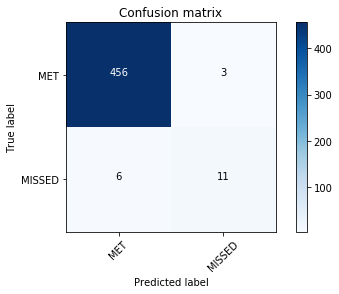

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=['MET','MISSED'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['MET','MISSED'],normalize= False,  title='Confusion matrix')

In [37]:
#Descision tree visualization
from sklearn import tree
import pydotplus
dot_data = StringIO()
filename = "dectree.png"
featureNames = data.columns[0:2]
targetNames = data["RESOLUTION_SLA"].unique().tolist()
out=tree.export_graphviz(decTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


ModuleNotFoundError: No module named 'pydotplus'